<a href="https://colab.research.google.com/github/SHAGGY670/ongoing/blob/master/digitrecogniser.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as npm

In [55]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [56]:
x_train=x_train/255
x_test=x_test/255

In [57]:

len(x_train)

60000

In [58]:
len(x_test)

10000

In [59]:
x_train[0].shape

(28, 28)

In [60]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

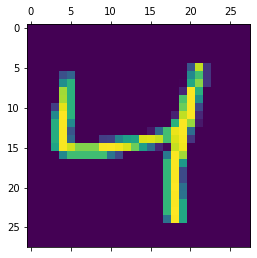

In [77]:
plt.matshow(x_train[2])

In [62]:
y_train[2]

4

In [63]:
y_train[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [64]:
flatr=x_train.reshape(len(x_train),28*28)
flate=x_test.reshape(len(x_test),28*28)
print(flatr.shape)
print(flate.shape)

(60000, 784)
(10000, 784)


In [65]:
model=keras.Sequential([
                  keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
    )
model.fit(flatr,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 940us/step - loss: 0.4740 - accuracy: 0.8759
Epoch 2/5
1875/1875 [==============================] - 2s 939us/step - loss: 0.3040 - accuracy: 0.9152
Epoch 3/5
1875/1875 [==============================] - 2s 872us/step - loss: 0.2838 - accuracy: 0.9205
Epoch 4/5
1875/1875 [==============================] - 2s 882us/step - loss: 0.2731 - accuracy: 0.9238
Epoch 5/5
1875/1875 [==============================] - 2s 894us/step - loss: 0.2669 - accuracy: 0.9265


In [66]:
model.evaluate(flate,y_test)

313/313 [==============================] - 0s 716us/step - loss: 0.2694 - accuracy: 0.9246


[0.26935604214668274, 0.9246000051498413]

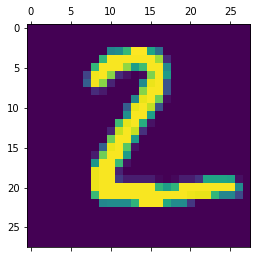

In [67]:
plt.matshow(x_test[0])

In [68]:
y_predicted=model.predict(flate)
y_predicted[0]

array([3.3310053e-01, 1.8526614e-03, 9.9957854e-01, 3.7857485e-01,
       6.1699068e-10, 7.6752567e-01, 8.8855726e-01, 9.5537001e-13,
       8.6447537e-02, 2.4318587e-09], dtype=float32)

In [70]:
npm.argmax(y_predicted[0])

7

In [73]:
y_predicted_labels=[npm.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [74]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [76]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 961,    0,    2,    2,    0,    4,    8,    2,    1,    0],
       [   0, 1111,    3,    2,    0,    1,    4,    2,   12,    0],
       [   6,    6,  928,   20,   12,    3,   11,   10,   32,    4],
       [   2,    0,   16,  938,    1,   17,    2,   10,   15,    9],
       [   2,    1,    3,    2,  917,    0,   11,    4,    9,   33],
       [   9,    2,    4,   49,   13,  757,   16,    7,   29,    6],
       [  11,    3,    9,    1,    7,    8,  916,    2,    1,    0],
       [   1,    5,   21,    8,    9,    1,    0,  950,    2,   31],
       [   7,    7,    7,   37,   10,   25,   11,   12,  850,    8],
       [  11,    6,    1,   13,   31,    5,    0,   21,    3,  918]],
      dtype=int32)>